In [1]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
import os  
os.chdir(R"D:\\AI\\AI Models\\3. OpenCV\\0- OpenCV\\Data\\Images")
img = cv.imread('messi5.jpg')
grey_image = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
template = cv.imread("messi_face.jpg",0)
#Detect w,h 
w,h=template.shape[::-1]
#وجود -1 عشان اجيب العكس بمعني اجيب العرض الاول وليس الارتفاع 
res = cv.matchTemplate(grey_image , template , cv.TM_CCORR_NORMED)
cv.imshow('Reslut', res)
print(res)
threshold = 0.99 
loc = np.where(res>= threshold)
print(loc)
for pt in zip(*loc[::-1]): #Can used zip(loc[1],loc[0])
    cv.rectangle(img,pt,(pt[0] + w , pt[1]+h),(0,0,255),2)
cv.imshow('Image',img)
cv.waitKey(0)
cv.destroyAllWindows()

[[0.732448   0.72272384 0.71455    ... 0.7513794  0.7556036  0.7599073 ]
 [0.73414993 0.7242173  0.7165806  ... 0.75592774 0.759958   0.7640461 ]
 [0.73490757 0.7250685  0.7173618  ... 0.75977015 0.763732   0.7679002 ]
 ...
 [0.87528694 0.87589717 0.87633383 ... 0.8479132  0.849744   0.85175186]
 [0.87714916 0.8776612  0.8782765  ... 0.8485309  0.8500069  0.8511209 ]
 [0.8782407  0.87853676 0.87916726 ... 0.84792966 0.84948975 0.85003465]]
(array([], dtype=int64), array([], dtype=int64))


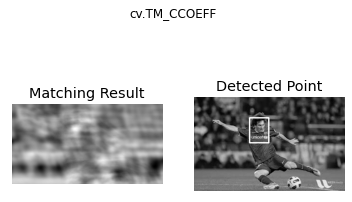

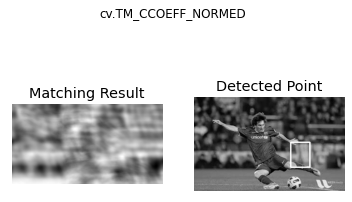

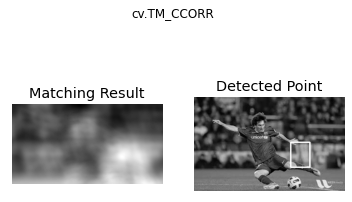

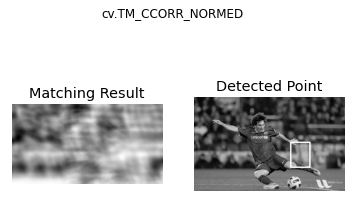

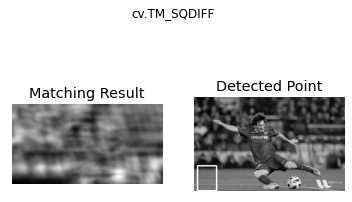

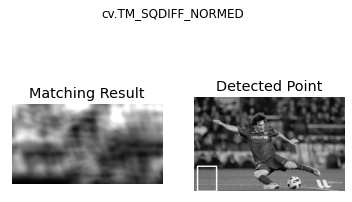

In [2]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import os  
os.chdir(R"D:\\AI\\AI Models\\3. OpenCV\\0- OpenCV\\Data\\Images")
img = cv.imread('messi5.jpg',cv.IMREAD_GRAYSCALE)
#assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread("messi_face.jpg",cv.IMREAD_GRAYSCALE)
#assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([],color='white')
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([],color ='white')
    plt.suptitle(meth)
    plt.show()

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import os  
os.chdir(R"D:\\AI\\AI Models\\3. OpenCV\\0- OpenCV\\Data\\Images")
img_rgb = cv.imread('mario.png')
#assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('10.png', cv.IMREAD_GRAYSCALE)
#assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)